In [ ]:
#FORECASTING - FBPROPHET - FACEBOOK
#FORECASTING - PREDICTING SOMETHING WITH RESPECT TO TIME USING THE PAST PAST AND PRESENT DATA
#FORECASTING - VEGETABLE PRICES
#Dataset - nhrdf.org
#1 quintal - 100kgs,1 ton - 1000kgs

In [ ]:
#Take the data and create dataframe
import pandas as pd
df = pd.read_html('/content/DailyWiseMarketArrivals.html')[-1]
df#-1 here considers the table with index -1

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800
4187,17/Sep/2022,BANGALORE,13200,1600,2000,1800


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape #4189 rows and 6 columns

(4189, 6)

In [ ]:
df.size #tells us the total no of elements in dataframe

25134

In [ ]:
df.info()#It tells us the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4188 non-null   object
 1   Market                4189 non-null   object
 2   Arrival(q)            4189 non-null   int64 
 3   Price Minimum (Rs/q)  4189 non-null   object
 4   Price Maximum (Rs/q)  4189 non-null   object
 5   Modal Price (Rs/q)    4189 non-null   object
dtypes: int64(1), object(5)
memory usage: 196.5+ KB


In [ ]:
#to check the null values
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
#Now let us drop the null values
df = df.dropna()

In [ ]:
df.isnull().sum()

Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
#FB PROPHET - It only takes data in form of 2 columns - ds and y - COMPULSORY
#SO rename the Date column as ds and rename the Modal Price (Rs/q) as y
df = df.rename(columns = {'Modal Price (Rs/q)':'y','Date':'ds'})
df

,ds,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),y
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4183,04/Jun/2022,BANGALORE,9670,2400,2800,2400
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800


In [ ]:
#Let us create a new dataframe and consider only 2 column - ds and y from old dataframe
df1 = df[['ds','y']]
df1

,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4183,04/Jun/2022,2400
4184,08/Jul/2022,2700
4185,11/Jul/2022,2700
4186,14/Sep/2022,1800


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4188 non-null   object
 1   y       4188 non-null   object
dtypes: object(2)
memory usage: 98.2+ KB


In [ ]:
#The datatype of the ds column is in object/string format.COnvert it to datetime format
#The datatype of y column is in object/string format.Convert it to integer format
df1['ds'] = pd.to_datetime(df1['ds'])
df1['y'] = df1['y'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4188 non-null   datetime64[ns]
 1   y       4188 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 98.2 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


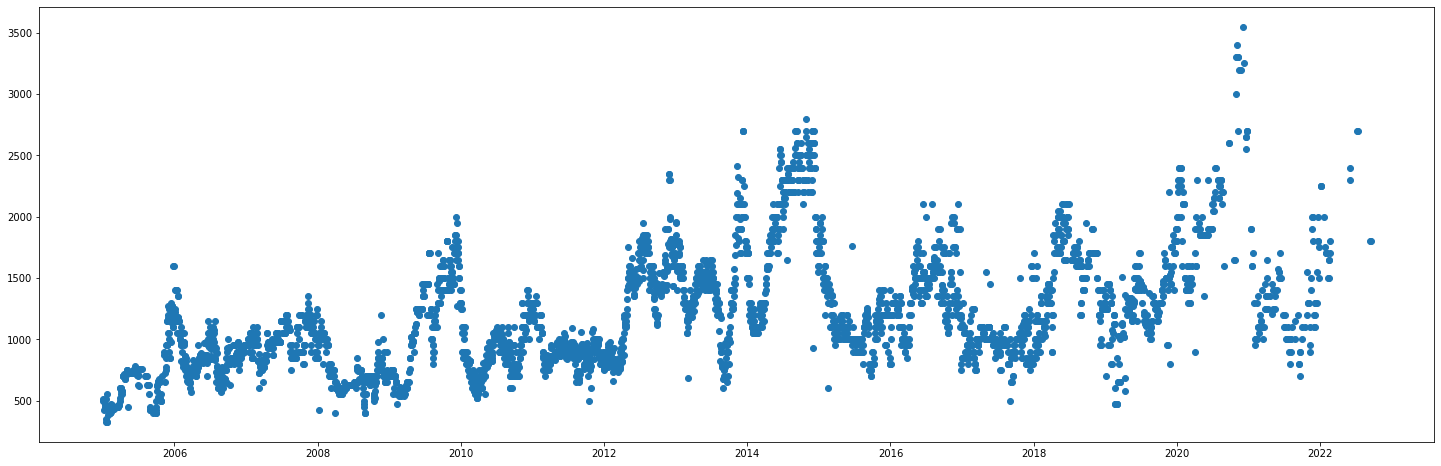

In [ ]:
#VISUALISATION
import matplotlib.pyplot as plt
plt.figure(figsize = (25,8))#just increasing the figure size
plt.scatter(df1['ds'],df1['y'])

In [ ]:
#FB PROPHET
import prophet
op = prophet.Prophet()

In [ ]:
op.fit(df1) #We are plotting the values of df1 in Fb propeht library

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp37gi2gd3/oxo5m4ng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp37gi2gd3/tsnafou2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46574', 'data', 'file=/tmp/tmp37gi2gd3/oxo5m4ng.json', 'init=/tmp/tmp37gi2gd3/tsnafou2.json', 'output', 'file=/tmp/tmp37gi2gd3/prophet_modelbey0p23e/prophet_model-20221109143914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = op.make_future_dataframe(periods = 1000,freq = 'D')
forecast = op.predict(forecast)

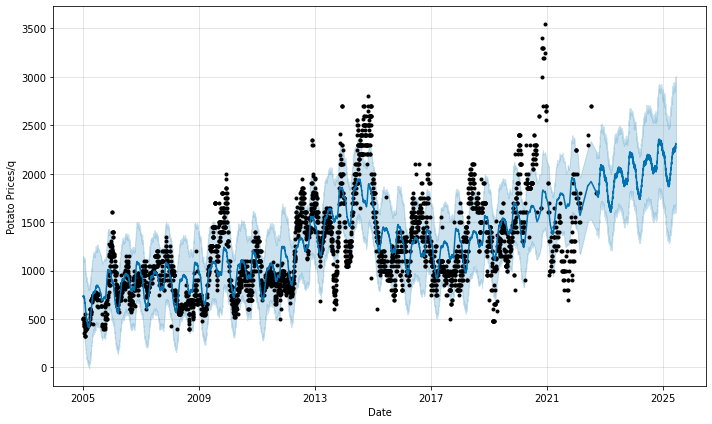

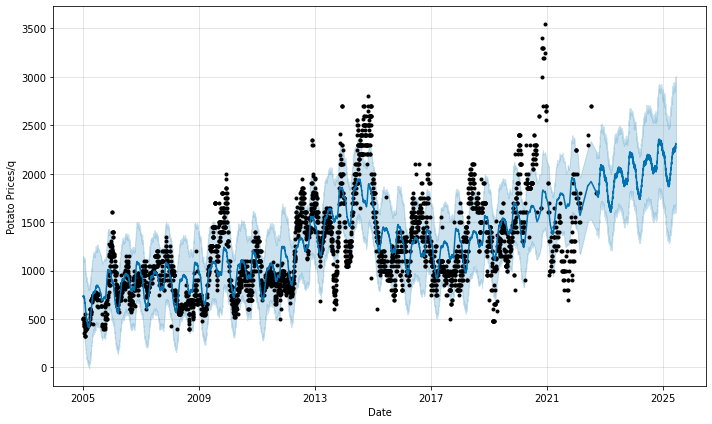

In [ ]:
op.plot(forecast,xlabel = 'Date',ylabel = 'Potato Prices/q')
#The black dots - Actual points of Potato prices(1st jan 2005 - 17th sep 2022)
#Light blue shade - It is the minimum and the maximum price of potatoes as predicted by our model
#Dark blue line - Best fit line